In [ ]:
import pandas as pd
import numpy as np
import os
import csv
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr

#Ejercicio 1
baseinterna = pd.read_csv("base_ini_interna.csv")

baseinterna


# En la base interna tenemos 9 variables, con un total de 50,000, los cuales son clientes que solicitan un prestamo.Cada cliente cuenta con un ID UNICO.
# con la fecha en la que solicta el prestamo. Contaos con 4 distintos componentes lo cuales son.
#El comp_interno1 nos indica la cantidad de dinero que tiene dentro del banco.
# El comp_interno2 es la caracteristica del prestamo que esta solicitando cada cliente.
# El comp_interno3 nos indica el numero de adeudos que tiene el cliente.
# El comp_interno 4 , podemos suponer que nos indica la edad del cliente por el rango en el que se encuntran los datos en el cual el minimo es de 24 anios 
# y el maximo de 79.
# Categoria 1 podemos suponer que nos indica el rango de ingresos que tiene cada cliente.
# Podemos suponer que categoria2 es el rango de estudios del cliente.
#Por lo que podemos decir que las variables que no nos sirven son, comp_interno4 y todas las que son tipo categorico ya que no nos dan informacion suficiente 
# para poder decidir si se le otroga el prestamo.


print(baseinterna["comp_interno4"].max())
print(baseinterna["comp_interno4"].min())



baseinterna= baseinterna.drop(["comp_interno4", "categoria1", "categoria2", "categoria3"],axis =1)
baseinterna
#se eliminan las variables con informacion deficiente


baseexterna = pd.read_csv("base_ini_externa.txt", sep=" ")


baseexterna 



#Convertimos base_ini_externa.txt en un dataframe 
# En esta tabla tenemos el ID de cada cliente que solicita un prestamo y cuatro distintos componentes externos:
#comp_externo1 es el ingreso diario del cliente 
#comp_externo2 es la razon de ingresos y egresos del cliente 
#comp_externo 3 es la diferencia entre ingresos y egresos 
#comp_externo no aporta informacion relevante



print(baseexterna["comp_externo2"].max())
print(baseexterna["comp_externo2"].min())
print(baseexterna["comp_externo3"].max())
print(baseexterna["comp_externo3"].min())
print(baseexterna["comp_externo4"].unique())



baseexterna= baseexterna.drop(["comp_externo4"],axis =1)
baseexterna



basecomp2 = pd.read_csv("base_comportamiento_2.txt",sep=" ")
basecomp2
#En esta tabla nos dan el registro de los clientes a los que se les dio el prestamo, mediantes los folios(num_caso) que se les asigno.
#Mes_informacion nos representa las fechas en las que se realizaria el pago del prestamo.
#Concluimos que no se elimina ninguna variable debido a que todas nos proporcinan informacion acerca delas personas que recibieron el prestamo. 



basecomp2_corr = basecomp2.groupby(['num_caso']).count()
basecomp2_corr= basecomp2_corr.drop(["mes_informacion"], axis=1)
basecomp2_corr



basecomp3 = pd.read_csv("base_comportamiento_3.csv")
basecomp3
#En esta base podemos notar que el comportamiento j nos dice el numero de pagos pendiente del cliente que ya recibio el prestamo, si en la base aparece un cero 
#quiere decir que no debe ningun pago, pero si en la base aparece 1,2,3,... quiere decir que debe esos pagos, si en la base aparece un cero despues
# de un numero mayor o igual a uno quiere decir que ya liquido los pagos pendientes. Por lo que con base a esta informacion podriamos hacer una clasificaccion de los clientes
# si el numero de veces que aparace un numero mayor o igual a 1 es cero, entonces podriamos calificar como un buen cliente ya que no tiene ningun adeudo, 
# y su calificacion ira bajando entre mas adeudos tenga



basecomp3_cor = basecomp3[ basecomp3["comportamiento_j"]>0]
basecomp3_cor= basecomp3_cor.drop(["mes_informacion"], axis=1)
basecomp3_corr= basecomp3_cor.groupby(["num_caso"]).count()
basecomp3_corr



basecompmixto = pd.read_csv("base_ini_parte1.csv")



basecompmixto
# En esta tabla nos dan los dos ID's que le corresponden a cada cliente.
#El comp_mixto1 es el indice entre el comp_interno1 y el comp_externo1
# Al no tener informacion comp_mixto1 decidimos no ocupar dicha variable



basecompmixto= basecompmixto.drop(["comp_mixto1"],axis =1)
basecompmixto



basecompint4 = pd.read_table("bd_inicio_parte1.txt")



basecompint4
#podemos ver que tiene los mismo datos que la base interna, por lo que los datos que necesitamos los podemos obtener de esa tabla
#por lo que no es necesario usar esta base 



baseinversion = pd.read_csv("base_inversion.txt", sep=" ")


baseinversion


#En esta tabla tenemos dos variables en la cual nos representa el id2 de cada cliente y su inversion en el banco presente


cruce1 = pd.merge(baseinterna, baseexterna, how="inner", on=["_id_"])
cruce1
#En este cruce ya tenemos los comportaminetos internos y extrernos que les corresponden a cada cliente



79.0
24.0
861.8213157138754
0.0002872737719046251
159.0
-609.0
[-2.30000000e+02  9.99999977e+09 -2.29000000e+02 -2.28000000e+02
 -2.27000000e+02 -2.26000000e+02]


,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3
0,78213,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0
1,76457,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0
2,40666,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0
3,8329,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0
4,68389,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0
...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0
49996,9126,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0
49997,44847,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0
49998,87200,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0


In [ ]:
cruce2= pd.merge(basecompmixto, cruce1, how="inner", on=["_id_"])
cruce2

,_id_,_id2_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3
0,78213,1798899,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0
1,76457,1758511,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0
2,40666,935318,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0
3,8329,191567,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0
4,68389,1572947,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0
...,...,...,...,...,...,...,...,...,...
49995,78795,1812285,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0
49996,9126,209898,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0
49997,44847,1031481,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0
49998,87200,2005600,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0


In [ ]:
cruce3= pd.merge(cruce1, cruce2, how="outer", on=["_id_","fecha_inicio",'comp_interno1','comp_interno2','comp_interno3','comp_externo1','comp_externo2','comp_externo3'])
cruce3

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3,_id2_
0,78213,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0,1798899
1,76457,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0,1758511
2,40666,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0,935318
3,8329,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0,191567
4,68389,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0,1572947
...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0,1812285
49996,9126,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0,209898
49997,44847,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0,1031481
49998,87200,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0,2005600


In [ ]:
cruce3["target"] = cruce3.comp_interno2
cruce3

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_externo1,comp_externo2,comp_externo3,_id2_,target
0,78213,2020-03-25,0.000000,b'0',11.0,260.869565,25.854639,56.0,1798899,b'0'
1,76457,2020-02-13,0.000000,b'1',28.0,40.579710,2.872738,62.0,1758511,b'1'
2,40666,2018-01-24,0.000000,b'1',25.0,NaN,NaN,119.0,935318,b'1'
3,8329,2016-10-07,0.000000,b'1',14.0,349.275362,34.616490,94.0,191567,b'1'
4,68389,2019-07-30,2026.342452,b'1',1.0,276.811594,27.434645,125.0,1572947,b'1'
...,...,...,...,...,...,...,...,...,...,...
49995,78795,2020-04-27,0.000000,b'1',2.0,140.579710,13.932778,95.0,1812285,b'1'
49996,9126,2016-08-10,1215.805471,b'1',30.0,188.405797,9.652399,114.0,209898,b'1'
49997,44847,2018-09-17,0.000000,b'1',3.0,434.782609,33.323758,124.0,1031481,b'1'
49998,87200,2020-10-27,0.000000,b'1',19.0,919.130435,57.454754,108.0,2005600,b'1'


In [ ]:

cruce3.loc[cruce3.comp_interno2 == "b'1'",'target']= 1
cruce3.loc[cruce3.comp_interno2 == "b'0'",'target']= 0


In [ ]:
cruce3 = cruce3.drop(['comp_interno2'], axis = 1)



In [ ]:
cruce3 = cruce3.drop(['fecha_inicio'], axis = 1)

In [ ]:
cruce3 = cruce3.drop(['_id2_'], axis = 1)

KeyError: ignored

In [ ]:
cruce3 = cruce3.drop(['_id_'], axis = 1)

In [ ]:
cruce3.target = pd.to_numeric(cruce3.target, errors='coerce')

In [ ]:
bd = cruce3
bd = pd.DataFrame(df)
df.head()

,comp_interno1,comp_interno3,comp_externo1,comp_externo2,comp_externo3,target
0,0.000000,11.0,260.869565,25.854639,56.0,0
1,0.000000,28.0,40.579710,2.872738,62.0,1
2,0.000000,25.0,NaN,NaN,119.0,1
3,0.000000,14.0,349.275362,34.616490,94.0,1
4,2026.342452,1.0,276.811594,27.434645,125.0,1


In [ ]:
#Hacemos validación y test
X = bd.iloc[:,0:5].values
y = bd.iloc[:,5].values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*
import seaborn as sns

In [ ]:
!pip install optbinning

In [ ]:
from optbinning import OptimalBinning

In [ ]:
train, test = train_test_split(bd, test_size = 0.30, random_state = 100)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   comp_interno1  35000 non-null  float64
 1   comp_interno3  35000 non-null  float64
 2   comp_externo1  33462 non-null  float64
 3   comp_externo2  31024 non-null  float64
 4   comp_externo3  34997 non-null  float64
 5   target         35000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 4253 to 25776
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   comp_interno1  15000 non-null  float64
 1   comp_interno3  15000 non-null  float64
 2   comp_externo1  14369 non-null  float64
 3   comp_externo2  13386 non-null  float64
 4   comp_externo3  14997 non-null  float64
 5   target         15000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 820.3 KB


In [ ]:
y = train.target
y

48824    1
2704     1
25631    1
7285     1
27346    1
        ..
16304    1
79       1
12119    0
14147    1
38408    0
Name: target, Length: 35000, dtype: int64

In [ ]:
optb_id = OptimalBinning(name="_id_", dtype="numerical", solver="cp")
optb_comp_interno1 = OptimalBinning(name="comp_interno1", dtype="numerical", solver="cp")
optb_comp_interno3 = OptimalBinning(name="comp_interno3", dtype="numerical", solver="cp")
optb_comp_externo1 = OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp")
optb_comp_externo2 = OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp")
optb_comp_externo3 = OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp",)


In [ ]:

optb_comp_interno1.fit(train["comp_interno1"].values, y)
optb_comp_interno3.fit(train["comp_interno3"].values, y)
optb_comp_externo1.fit(train["comp_externo1"].values, y)
optb_comp_externo2.fit(train["comp_externo2"].values, y)
optb_comp_externo3.fit(train["comp_externo3"].values, y)


OptimalBinning(name='comp_externo3')

In [ ]:

display(optb_comp_interno1.splits)
display(optb_comp_interno3.splits)
display(optb_comp_externo1.splits)
display(optb_comp_externo2.splits)
display(optb_comp_externo3.splits)


array([ 498.98681641,  833.33334351, 2436.46411133, 4261.90478516])

array([ 1.5, 17.5, 20.5, 25.5])

array([ 89.85362244, 147.0289917 , 280.24638367, 367.95651245,
       532.85507202, 705.94204712, 869.4203186 ])

array([19.54366589, 22.36426353, 27.78655529, 39.60370636, 57.65728188,
       76.40045929])

array([-27.5])

In [ ]:

comp_interno1_table = optb_comp_interno1.binning_table
comp_interno3_table = optb_comp_interno3.binning_table
comp_externo1_table = optb_comp_externo1.binning_table
comp_externo2_table = optb_comp_externo2.binning_table
comp_externo3_table = optb_comp_externo3.binning_table


In [ ]:

display(comp_interno1_table.build())
display(comp_interno3_table.build())
display(comp_externo1_table.build())
display(comp_externo2_table.build())
display(comp_externo3_table.build())


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 498.99)",23061,0.658886,7368,15693,0.680500,0.128793,0.011214,0.001401
1,"[498.99, 833.33)",2181,0.062314,585,1596,0.731774,-0.118783,0.000857,0.000107
2,"[833.33, 2436.46)",6029,0.172257,1476,4553,0.755183,-0.241589,0.009529,0.001188
3,"[2436.46, 4261.90)",1973,0.056371,449,1524,0.772428,-0.33721,0.005938,0.000739
4,"[4261.90, inf)",1756,0.050171,348,1408,0.801822,-0.512862,0.011695,0.001446
5,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,35000,1.000000,10226,24774,0.707829,,0.039233,0.004881


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",5047,0.144200,1960,3087,0.611650,0.430606,0.028877,0.003582
1,"[1.50, 17.50)",15137,0.432486,4592,10545,0.696637,0.0535251,0.001253,0.000157
2,"[17.50, 20.50)",5498,0.157086,1011,4487,0.816115,-0.605383,0.049794,0.006131
3,"[20.50, 25.50)",5649,0.161400,1531,4118,0.728979,-0.104585,0.001726,0.000216
4,"[25.50, inf)",3669,0.104829,1132,2537,0.691469,0.0778649,0.000646,0.000081
5,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,35000,1.000000,10226,24774,0.707829,,0.082296,0.010166


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 89.85)",5530,0.158000,1858,3672,0.664014,0.203625,0.006816,0.000851
1,"[89.85, 147.03)",4593,0.131229,1442,3151,0.686044,0.103172,0.001426,0.000178
2,"[147.03, 280.25)",7136,0.203886,2209,4927,0.690443,0.0826709,0.001417,0.000177
3,"[280.25, 367.96)",3437,0.098200,988,2449,0.712540,-0.0228911,0.000051,0.000006
4,"[367.96, 532.86)",4183,0.119514,1120,3063,0.732250,-0.121205,0.001711,0.000214
5,"[532.86, 705.94)",2847,0.081343,758,2089,0.733755,-0.128896,0.001314,0.000164
6,"[705.94, 869.42)",1759,0.050257,398,1361,0.773735,-0.344662,0.005520,0.000687
7,"[869.42, inf)",3977,0.113629,854,3123,0.785265,-0.411757,0.017519,0.002175
8,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
9,Missing,1538,0.043943,599,939,0.610533,0.435307,0.008999,0.001116


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 19.54)",12859,0.367400,3878,8981,0.698421,0.0450695,0.000753,0.000094
1,"[19.54, 22.36)",1830,0.052286,616,1214,0.663388,0.206432,0.002319,0.000289
2,"[22.36, 27.79)",2339,0.066829,713,1626,0.695169,0.0604643,0.000247,0.000031
3,"[27.79, 39.60)",3974,0.113543,1110,2864,0.720684,-0.062998,0.000445,0.000056
4,"[39.60, 57.66)",3914,0.111829,1090,2824,0.721513,-0.0671154,0.000497,0.000062
5,"[57.66, 76.40)",2168,0.061943,547,1621,0.747694,-0.201488,0.002406,0.000300
6,"[76.40, inf)",3940,0.112571,907,3033,0.769797,-0.322304,0.010872,0.001353
7,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
8,Missing,3976,0.113600,1365,2611,0.656690,0.236282,0.006637,0.000828
Totals,,35000,1.000000,10226,24774,0.707829,,0.024176,0.003013


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -27.50)",1780,0.050857,644,1136,0.638202,0.317291,0.005433,6.762564e-04
1,"[-27.50, inf)",33217,0.949057,9581,23636,0.711563,-0.0181278,0.000311,3.883657e-05
2,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000e+00
3,Missing,3,0.000086,1,2,0.666667,0.191714,0.000003,4.082088e-07
Totals,,35000,1.000000,10226,24774,0.707829,,0.005747,7.155012e-04


Notemos que en todas las tablas, excepto la última, tenemos un IV total mayor al 2%. La última tabla que representa el comp_externo3, representa menos del 0.5747%, lo cual es una variable predicadora muy débil pero aún así decidimos no eliminarla para no tener pocas variables.

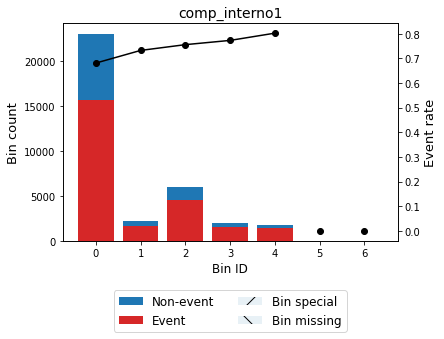

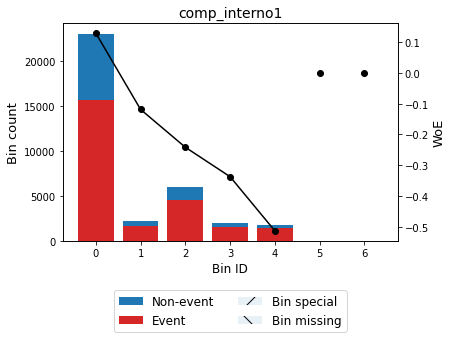

In [ ]:
comp_interno1_table.plot(metric="event_rate")
comp_interno1_table.plot(metric="woe")

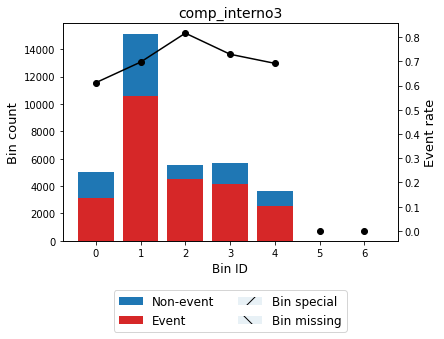

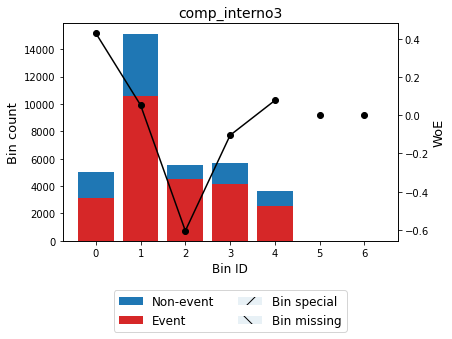

In [ ]:
comp_interno3_table.plot(metric="event_rate")
comp_interno3_table.plot(metric="woe")

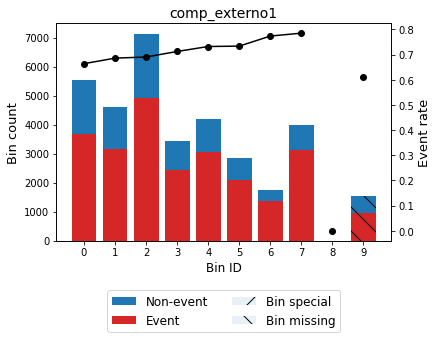

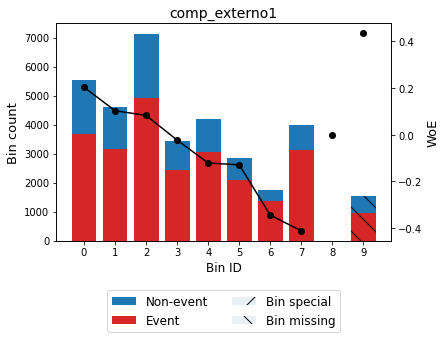

In [ ]:
comp_externo1_table.plot(metric="event_rate")
comp_externo1_table.plot(metric="woe")

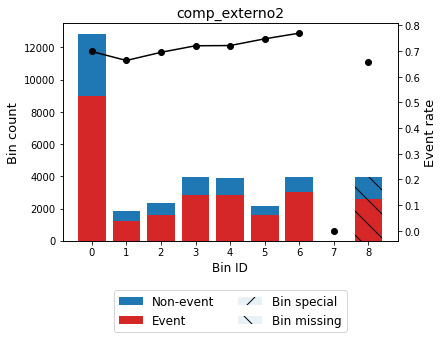

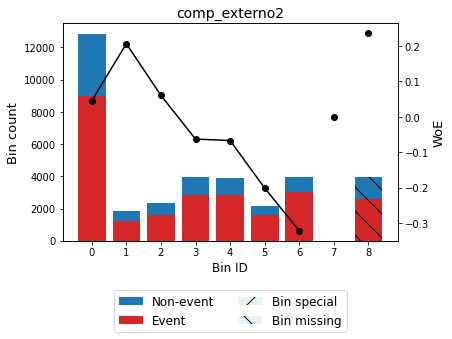

In [ ]:
comp_externo2_table.plot(metric="event_rate")
comp_externo2_table.plot(metric="woe")

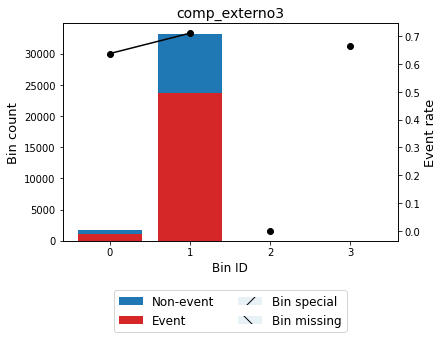

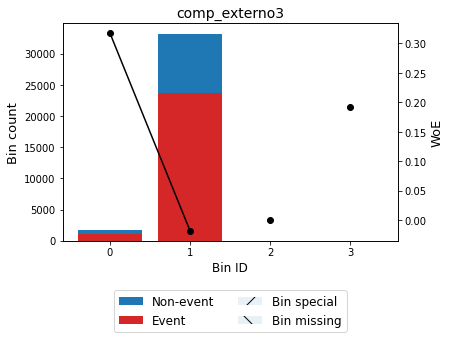

In [ ]:
comp_externo3_table.plot(metric="event_rate")
comp_externo3_table.plot(metric="woe")

In [ ]:
train["woe_comp_interno1"] = optb_comp_interno1.transform(train["comp_interno1"], metric="woe")
train["woe_comp_interno3"] = optb_comp_interno3.transform(train["comp_interno3"], metric="woe")
train["woe_comp_externo1"] = optb_comp_externo1.transform(train["comp_externo1"], metric="woe")
train["woe_comp_externo2"] = optb_comp_externo2.transform(train["comp_externo2"], metric="woe")
train["woe_comp_externo3"] = optb_comp_externo3.transform(train["comp_externo3"], metric="woe")


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comp_interno1      35000 non-null  float64
 1   comp_interno3      35000 non-null  float64
 2   comp_externo1      33462 non-null  float64
 3   comp_externo2      31024 non-null  float64
 4   comp_externo3      34997 non-null  float64
 5   target             35000 non-null  int64  
 6   woe_comp_interno1  35000 non-null  float64
 7   woe_comp_interno3  35000 non-null  float64
 8   woe_comp_externo1  35000 non-null  float64
 9   woe_comp_externo2  35000 non-null  float64
 10  woe_comp_externo3  35000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 3.2 MB


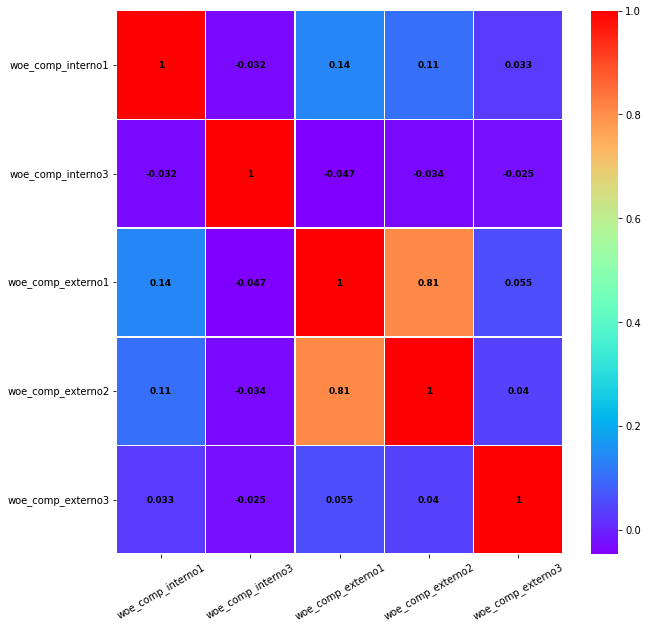

In [ ]:
corr = train.iloc[:,6:].corr()


xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [ ]:
X_woe_train=train.iloc[:,6:10]
y_train=train.iloc[:,5]
X_woe_train.head()

,woe_comp_interno1,woe_comp_interno3,woe_comp_externo1,woe_comp_externo2
48824,0.128793,-0.104585,-0.128896,-0.067115
2704,0.128793,-0.605383,0.082671,0.206432
25631,-0.241589,0.053525,0.103172,0.045070
7285,-0.118783,-0.605383,0.082671,0.206432
27346,-0.241589,0.053525,-0.121205,-0.067115


In [ ]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

LogisticRegression()

y_pred
 [1 1 1 ... 1 1 1]
y_pred1
 [0.98809448 1.3670441  0.93265641 ... 1.22698559 1.50707931 0.58485702]


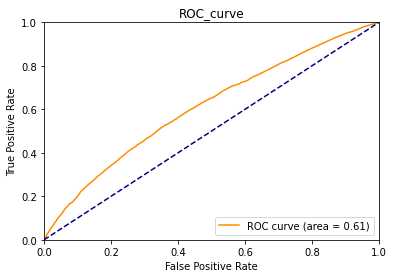

In [ ]:

y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
coe=model.coef_
coe[0]

array([-0.92697531, -1.05140492, -1.18377955,  0.37601118])

In [ ]:
f_train=train[["target","woe_comp_interno1","woe_comp_interno3","woe_comp_externo1","woe_comp_externo2","woe_comp_externo3"]]
X_woe_train=f_train.iloc[:,1:]
y_train=f_train.iloc[:,0]
X_woe_train.head()
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

In [ ]:
coe=model.coef_
coe[0]


array([-0.9190438 , -1.05697505, -1.16483468,  0.36940587, -0.89830207])

(array([5.160e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.200e+01, 4.710e+02,
        6.010e+02, 0.000e+00, 0.000e+00, 4.020e+02, 3.260e+02, 5.500e+01,
        0.000e+00, 1.600e+02, 4.910e+02, 5.300e+02, 4.340e+02, 1.282e+03,
        2.400e+01, 5.500e+01, 3.900e+02, 1.640e+03, 1.133e+03, 1.307e+03,
        6.270e+02, 7.950e+02, 1.405e+03, 1.230e+02, 7.550e+02, 9.520e+02,
        6.110e+02, 1.914e+03, 5.840e+02, 6.190e+02, 3.800e+02, 3.560e+02,
        5.690e+02, 8.610e+02, 5.650e+02, 7.920e+02, 7.710e+02, 1.026e+03,
        3.810e+02, 3.520e+02, 6.130e+02, 1.114e+03, 3.470e+02, 4.680e+02,
        4.720e+02, 2.990e+02, 7.780e+02, 6.850e+02, 2.830e+02, 2.870e+02,
        8.520e+02, 4.440e+02, 1.690e+02, 2.520e+02, 9.700e+01, 8.130e+02,
        1.120e+02, 1.240e+02, 2.080e+02, 8.000e+01, 2.590e+02, 3.660e+02,
        9.500e+01, 3.200e+01, 1.880e+02, 4.650e+02, 3.900e+01, 5.700e+01,
        1.110e+02, 9.800e+01, 4.200e+01, 6.200e+01, 2.000e+01, 4.200e+01,
        8.000e+00, 3.200e+01, 1.700e+0

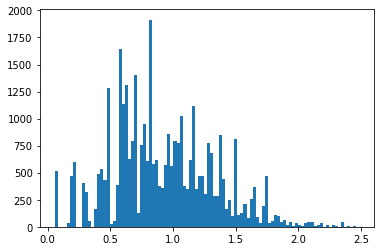

In [ ]:
hist(y_pred1,bins=100)



In [ ]:
train.to_csv("bd_train.csv",index=None) 

In [ ]:
coe[0][0]

-0.9190438011483187

In [ ]:
coe[0][1]

-1.0569750508747446

In [ ]:
coe[0][2]

-1.1648346761164836

In [ ]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

Validación cruzada

In [ ]:
cross_val_score(clf,X_woe_train,y_train,cv=5).mean()


0.7072571428571429

In [ ]:
!pip install pydotplus

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from pylab import*
import seaborn as sns
import numpy as np


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [ ]:
X = bd.copy()
y = X.pop('target')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

In [ ]:
num_features = X_train.select_dtypes(include='number').columns.to_list()

In [ ]:
num_features

['comp_interno1',
 'comp_interno3',
 'comp_externo1',
 'comp_externo2',
 'comp_externo3']

In [ ]:
cat_features = X_train.select_dtypes(include='object').columns.to_list()

In [ ]:
cat_features

[]

In [ ]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [ ]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

In [ ]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')
#El remainder=drop es para eliminar la columna que no se le aplicó ninguna transformación

In [ ]:
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])

In [ ]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['comp_interno1',
                                                   'comp_interno3',
                                                   'comp_externo1',
                                                   'comp_externo2',
                                                   'comp_externo3']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                   

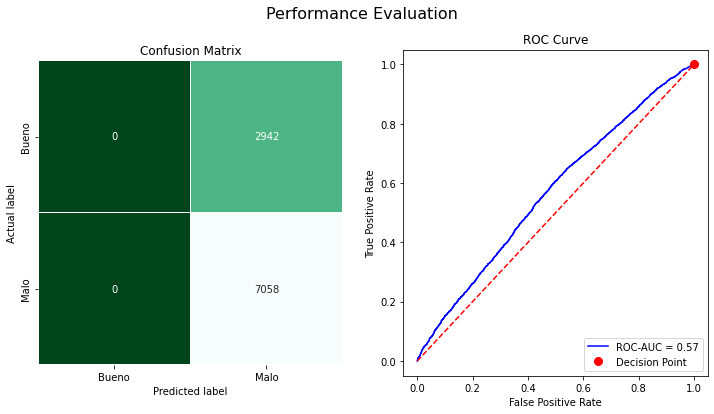

In [ ]:
LABELS = ['Bueno', 'Malo']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError('''There are missing values in the array! 
                                Please remove them.''')

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)
        
        self.upper_band_ = mean_vec + self.n_std * std_vec
        self.lower_band_ = mean_vec - self.n_std * std_vec
        self.n_features_ = len(self.upper_band_)
        
        return self 
    
    def transform(self, X, y = None):
        X_copy = pd.DataFrame(X.copy())
        
        upper_band = np.repeat(
            self.upper_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        lower_band = np.repeat(
            self.lower_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        
        X_copy[X_copy >= upper_band] = upper_band
        X_copy[X_copy <= lower_band] = lower_band
        
        return X_copy.values

In [ ]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [ ]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}


In [ ]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=5, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)
#print(f'Best parameters: {classifier_gs.best_params_}')
#print(f'Recall (Training set): {classifier_gs.best_score_:.4f}')
#print(f'Recall (Test set): {metrics.recall_score(y_test,classifier_gs.predict(X_test)):.4f}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['comp_interno1',
                                                                          'comp_interno3',
                                                                          'comp_externo1',
                                                                      

In [ ]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2}
Recall (Training set): 1.0000
Recall (Test set): 1.0000


El mejor modelo es la regresión logistica Woe ya que tenemos una validación cruzada media de 0.7072 mientras que para el arbol de validación tenemos una media de 0.63